In [22]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv("nasdaq100_futures.csv")
data = data.set_index("Date")

In [24]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-09-18,3721.0,3785.5,3602.0,3653.5,3653.5,72994.0
1,2000-09-19,3658.5,3817.0,3656.0,3804.0,3804.0,70029.0
2,2000-09-20,3801.5,3874.0,3715.5,3853.0,3853.0,78832.0
3,2000-09-21,3852.0,3874.0,3744.0,3765.0,3765.0,70719.0
4,2000-09-22,3673.0,3780.0,3615.0,3776.0,3776.0,55926.0


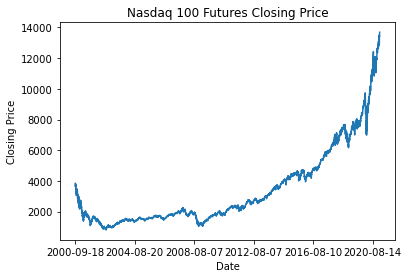

In [43]:
# Plot the Adj Close
import matplotlib.pyplot as plt
close = data["Adj Close"].dropna()
plt.figure()
close.plot()
plt.ylabel("Closing Price")
plt.title("Nasdaq 100 Futures Closing Price")
plt.savefig("Nasdaq_100_futures_closing_price.png", dpi=800)

In [28]:
# Start MLE
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import pymc3 as pm3
# import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

/Users/justinjiang/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/justinjiang/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [29]:
# define likelihood function
def MLERegression(params):
    intercept, beta, sd = params[0], params[1], params[2]
    yhat = intercept + beta*x # predictions
    negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )
    return(negLL)

In [42]:
# Guess
guess = np.array([100,100,10])
x = close.values
y = [i for i in range(0,len(x))]
y = np.array(y)
results = minimize(MLERegression, guess, method = "Nelder-Mead", 
 options={"disp": True})

Optimization terminated successfully.
         Current function value: 41487.958753
         Iterations: 303
         Function evaluations: 547


In [40]:
results

 final_simplex: (array([[9.11259661e+02, 4.84391343e-01, 7.99653430e+02],
       [9.11259594e+02, 4.84391365e-01, 7.99653445e+02],
       [9.11259686e+02, 4.84391350e-01, 7.99653424e+02],
       [9.11259639e+02, 4.84391356e-01, 7.99653463e+02]]), array([41487.95875278, 41487.95875278, 41487.95875278, 41487.95875278]))
           fun: 41487.95875277542
       message: 'Optimization terminated successfully.'
          nfev: 405
           nit: 224
        status: 0
       success: True
             x: array([9.11259661e+02, 4.84391343e-01, 7.99653430e+02])